### Fill out:
Name & Surname:  Zohaib javed

Student ID: 34290826

## W1&W2 post studio exercises (revision, kNN)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to answer the questions stated in the exercises in markdown cell. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

For these exercises you will use the `penguins` dataset from seaborn. Load it using load_dataset().

In [98]:
# as there were warnings about future changes so far non-affecteing our calculations - we'll import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Exercise 1 (cleaning, plotting)

First, create a numerical code for classification rather than using the string value of `species` (add column named, e.g., `code`). 

We will be using columns `flipper length`, `bill depth`, `species`, `code`; drop rows that have at least one missing value in any of these columns. Hint: dropna() and play around with its parameters such as subset etc.

Next, create:

- a feature array which consists of the `flipper length` and `bill depth` (**show first 5 rows**), 

- a target (i.e., Y or outcome) series which consists of the species `code` (**show first 5 values**),

- and an array which contains unique values of species names (**show all**). 

Also, **plot a scatter plot** of the feature array against the target series (include legend). Hint: Plot flipper length against bill depth and colour according to `target series` - label will have 3 levels: 0,1,2. If you would like scatterplot with species names - use penguins column `species`.)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#loaded the data set 
data_set = sns.load_dataset("penguins")

#converted to the coped.
data_set['code'] = data_set.species.astype('category').cat.codes 

#dropping the missing value 
data_set=data_set.dropna()
data_set

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2


In [104]:
"""showing flipper length and bill depth (show first 5 rows)"""

feature = data_set.iloc[:6, 3:5]   
feature

,bill_depth_mm,flipper_length_mm
0,18.7,181.0
1,17.4,186.0
2,18.0,195.0
4,19.3,193.0
5,20.6,190.0
6,17.8,181.0


In [106]:
X = data_set.iloc[:, 3:5]   
X

,bill_depth_mm,flipper_length_mm
0,18.7,181.0
1,17.4,186.0
2,18.0,195.0
4,19.3,193.0
5,20.6,190.0
...,...,...
338,13.7,214.0
340,14.3,215.0
341,15.7,222.0
342,14.8,212.0


In [108]:
first_5_code  = data_set['code'].head()
first_5_code



0    0
1    0
2    0
4    0
5    0
Name: code, dtype: int8

In [110]:
y  = data_set['code']
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: code, Length: 333, dtype: int8

In [112]:
category=data_set['species'].unique() # show the unique values of the species column

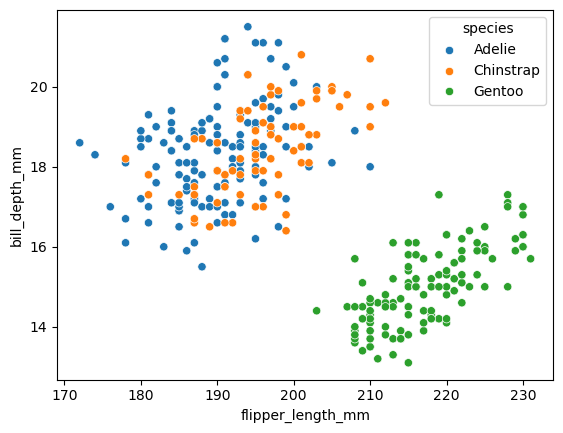

In [114]:
#plotting the scatter plot 

sns.scatterplot(x="flipper_length_mm", y="bill_depth_mm", hue='species', data=data_set); 

### Exercise 2 (kNN - raw data)

Split the data into training and testing set, with and 80:20 split, random state equal to 0. Create a kNN model with 10 nearest neighbours and uniform weights. Train (fit) model on training data. Calculate predictions for feature values in testing set (**show first 5 
entries**). **Print accuracy** (import from sklearn.metrics) and **plot confusion matrix** using function from the pre-studio notebook.

In [118]:
from sklearn.model_selection import train_test_split # import the splitting method from sklearn
from sklearn.metrics import confusion_matrix # import the confusion matrix function
from sklearn.metrics import accuracy_score # import the score functions 
from sklearn.neighbors import KNeighborsClassifier

In [120]:
#splitting the data

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)  
print(X, y)

     bill_depth_mm  flipper_length_mm
0             18.7              181.0
1             17.4              186.0
2             18.0              195.0
4             19.3              193.0
5             20.6              190.0
..             ...                ...
338           13.7              214.0
340           14.3              215.0
341           15.7              222.0
342           14.8              212.0
343           16.1              213.0

[333 rows x 2 columns] 0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: code, Length: 333, dtype: int8


In [122]:
#fitting the data with neighbour  = 10


n_neighbours = 10
clf = KNeighborsClassifier(n_neighbours, weights='uniform')
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


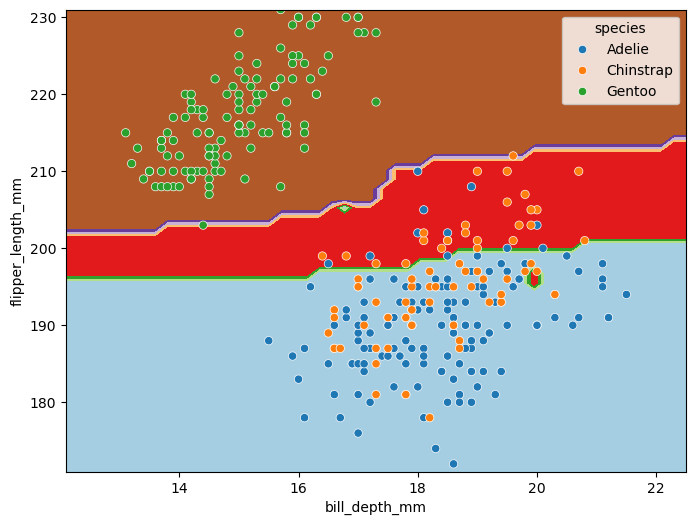

In [124]:
#creating a KNN model based on trining data 

def plt_decision_boundaries(skm,xx,yy):
    """
    Takes a sklearn model (skm) with two features and plots the decision boundaries.
    xx and yy correspond to matrices with the x and y coordinates.
    """
    # ravel is a numpy method which converts a two-dimensional array of size (n,m) to a vector of length nm
    # column_stack is a numpy function which takes two column arrays of length N 
    # and creates a two-dimensional array of size (N,2)
    # now pass the (N,2) array to the model and predict values based on these features, zz will have size (N,1)

    
    zz = skm.predict(np.column_stack([xx.ravel(), yy.ravel()]))  
    zz = zz.reshape(xx.shape) # reshape zz so it has the size of the original array xx, i.e., (n,m)
    plt.contourf(xx, yy, zz, cmap=plt.cm.Paired) # plot the decision boundaries as filled contours


x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                     np.linspace(y_min, y_max))

plt.figure(figsize=(8, 6))
plt_decision_boundaries(clf, xx, yy)
sns.scatterplot(x=X["bill_depth_mm"], y=X["flipper_length_mm"], hue=data_set['species']);




In [125]:
#predictions for feature values in testing set for first 5 enteries 
y_pred = clf.predict(X_test)



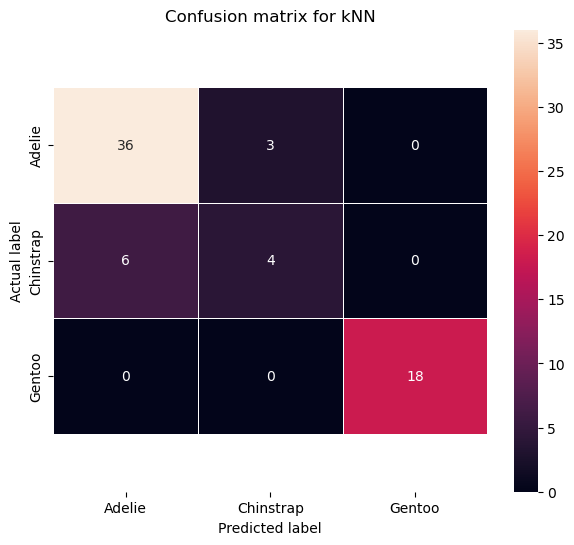

In [126]:
#plotting the confusion matrics  



def plt_confusion_matrix(cnf_matrix, cats, method):
    """
    Given actual target values and predicted values for a classifier 'method', 
    plots the confusion matrix
    """
    # write the confusion matrix to a dataframe with row and column names as the categories
    cmatrix = pd.DataFrame(cnf_matrix,columns=cats,index=cats) 

    f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
    sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
    plt.title('Confusion matrix for '+method) # add a title, + concatenates two strings
    plt.ylabel('Actual label') # add a ylabel
    plt.xlabel('Predicted label') # add a xlabel
    # adjust the bottom and top of the figure, so we can view all of it
    bottom, top = ax.get_ylim()  # get the y axis limits
    ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limit

cnf_matrix = confusion_matrix(y_test, y_pred) # create a confusion matrix for our actual and predicted values
plt_confusion_matrix(cnf_matrix, category, 'kNN')


In [129]:
#finding accuracy 

print("Accuracy:",np.round(accuracy_score(y_test, y_pred),3)) 

Accuracy: 0.866


### Exercise 3 (normalisation, plotting)

Our features have quite different variance. Let's see, whether accuracy of kNN model can improve by normalising the the feature array. Divide data in feature array by its standard deviation, **show first 5 rows** and **plot scatterplot of flipper length against bill_depth coloured according to code (or species).**

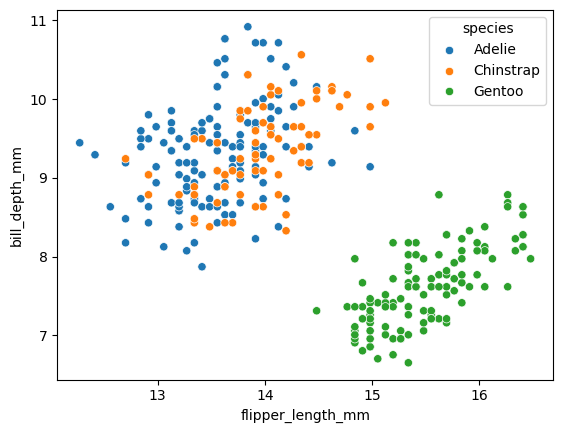

In [134]:
#taking standerdisation of features of the KNN plot to make the measurement more accurates and plottiig more accurate 

Xn = X/X.std()

#plotting scatter plot

sns.scatterplot(x=Xn["flipper_length_mm"], y=Xn["bill_depth_mm"], hue=data_set['species'] ); 

### Exercise 4 (kNN - normalised data)

Repeat Ex 2 on normalised data created in Ex 3. **Show accuracy score, plot confusion matrix. Did the accuracy score improve?**

No, the acccuracy remains same after taking its normalisation. 

Accuracy: 0.866


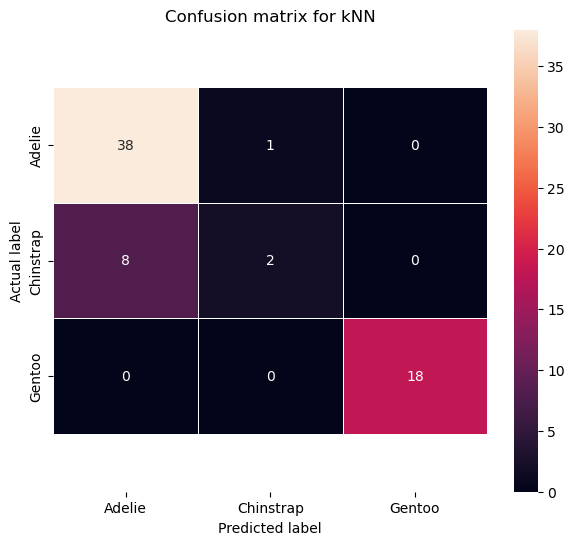

In [138]:
#
X_train,X_test,y_train,y_test=train_test_split(Xn,y,train_size=0.8,random_state=0)  
print("Accuracy:",np.round(accuracy_score(y_test, y_pred),3))


clf = KNeighborsClassifier(n_neighbours, weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrixx = confusion_matrix(y_test, y_pred) # create a confusion matrix for our actual and predicted values
plt_confusion_matrix(cnf_matrixx, category, 'kNN')
